## 1. Business objective

The business problem addressed here is how to accurately predict credit card approval decisions for potential customers. This problem is crucial for banks as they need to make informed lending decisions to minimize credit risk, reduce financial losses, enhance the customer experience, and ultimately increase profitability. The project aims to leverage data analytics and machine learning to improve the credit assessment process and help banks make more precise and efficient lending decisions, ultimately benefiting both the financial institution and its customers.

## 2. Data Preparation/Data preprocessing: Feature  Engineering + Feature selection

In [227]:
# Importing all required libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [6]:
# Importing the collected dataset:
credit_card = pd.read_csv("Credit_card.csv")
credit_card_label = pd.read_csv("Credit_card_label.csv")

In [104]:
credit_card.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2


In [105]:
credit_card_label.head()

,Ind_ID,label
0,5008827,1
1,5009744,1
2,5009746,1
3,5009749,1
4,5009752,1


## 2.2 Exploratory data analysis

In [110]:
# Merged both the tables for EDA
creditcard_df = credit_card.merge(credit_card_label, on='Ind_ID', how='inner')
creditcard_df

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2,0
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1,0
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4,0
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2,0


In [111]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [112]:
creditcard_df.describe(include='all')

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
count,1.548000e+03,1541,1548,1548,1548.000000,1.525000e+03,1548,1548,1548,1548,1526.000000,1548.000000,1548.0,1548.000000,1548.000000,1548.000000,1060,1548.000000,1548.000000
unique,NaN,2,2,2,NaN,NaN,4,5,5,6,NaN,NaN,NaN,NaN,NaN,NaN,18,NaN,NaN
top,NaN,F,N,Y,NaN,NaN,Working,Secondary / secondary special,Married,House / apartment,NaN,NaN,NaN,NaN,NaN,NaN,Laborers,NaN,NaN
freq,NaN,973,924,1010,NaN,NaN,798,1031,1049,1380,NaN,NaN,NaN,NaN,NaN,NaN,268,NaN,NaN
mean,5.078920e+06,NaN,NaN,NaN,0.412791,1.913993e+05,NaN,NaN,NaN,NaN,-16040.342071,59364.689922,1.0,0.208010,0.309432,0.092377,NaN,2.161499,0.113049
std,4.171759e+04,NaN,NaN,NaN,0.776691,1.132530e+05,NaN,NaN,NaN,NaN,4229.503202,137808.062701,0.0,0.406015,0.462409,0.289651,NaN,0.947772,0.316755
min,5.008827e+06,NaN,NaN,NaN,0.000000,3.375000e+04,NaN,NaN,NaN,NaN,-24946.000000,-14887.000000,1.0,0.000000,0.000000,0.000000,NaN,1.000000,0.000000
25%,5.045070e+06,NaN,NaN,NaN,0.000000,1.215000e+05,NaN,NaN,NaN,NaN,-19553.000000,-3174.500000,1.0,0.000000,0.000000,0.000000,NaN,2.000000,0.000000
50%,5.078842e+06,NaN,NaN,NaN,0.000000,1.665000e+05,NaN,NaN,NaN,NaN,-15661.500000,-1565.000000,1.0,0.000000,0.000000,0.000000,NaN,2.000000,0.000000
75%,5.115673e+06,NaN,NaN,NaN,1.000000,2.250000e+05,NaN,NaN,NaN,NaN,-12417.000000,-431.750000,1.0,0.000000,1.000000,0.000000,NaN,3.000000,0.000000


In [1]:
# Checking whether there is any wrong entries:

In [113]:
creditcard_df["Family_Members"].unique()

array([ 2,  3,  1,  4,  6,  5, 15], dtype=int64)

In [88]:
creditcard_df["CHILDREN"].unique()

array([ 0,  1,  2,  4,  3, 14], dtype=int64)

In [19]:
creditcard_df["label"].unique()

array([1, 0], dtype=int64)

In [114]:
creditcard_df.columns

Index(['Ind_ID', 'GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN',
       'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
       'Housing_type', 'Birthday_count', 'Employed_days', 'Mobile_phone',
       'Work_Phone', 'Phone', 'EMAIL_ID', 'Type_Occupation', 'Family_Members',
       'label'],
      dtype='object')

In [175]:
# Renaming columns properly:

creditcard_df.rename(columns = {
    'Ind_ID':'Id',
    'GENDER':'Gender',
    'CHILDREN':'Children',
    'Type_Income':'Income_Type',
    'EDUCATION':'Education',
    'EMAIL_ID':'Email_Id',
    'Type_Occupation':'Occupation_Type',
    'label':'Label'
}, inplace = True)

creditcard_df.head()

,Id,Gender,Car_Owner,Propert_Owner,Children,Annual_income,Income_Type,Education,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,Email_Id,Occupation_Type,Family_Members,Label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,166500.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [162]:
# Finding duplicates:
creditcard_df[creditcard_df.duplicated()]

,Id,GENDER,Car_Owner,Propert_Owner,Children,Annual_income,Income_Type,Education,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,Email_Id,Occupation_Type,Family_Members,Label


* There are no duplicated values in the entire dataset

## 2.2.2 Treating missing values

In [192]:
# Checking for missing values:
creditcard_df.isnull().sum()

Id                   0
Gender               7
Car_Owner            0
Propert_Owner        0
Children             0
Annual_income        0
Income_Type          0
Education            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
Email_Id             0
Occupation_Type    488
Family_Members       0
Label                0
dtype: int64

In [194]:
# Filling important features with median values:

median_income = creditcard_df['Annual_income'].median()
creditcard_df['Annual_income'].fillna(median_income, inplace=True)

creditcard_df['Gender'].fillna('NaN', inplace=True)

## Data exploration using plots:

<Axes: xlabel='Label', ylabel='count'>

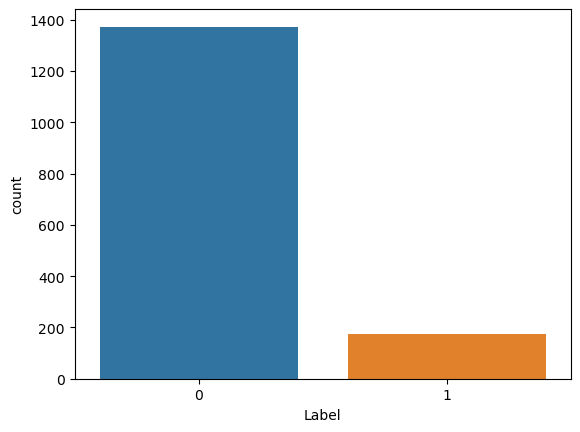

In [169]:
# Comparison of applications that are accepted and rejected
import seaborn as sns
sns.countplot(creditcard_df, x="Label")

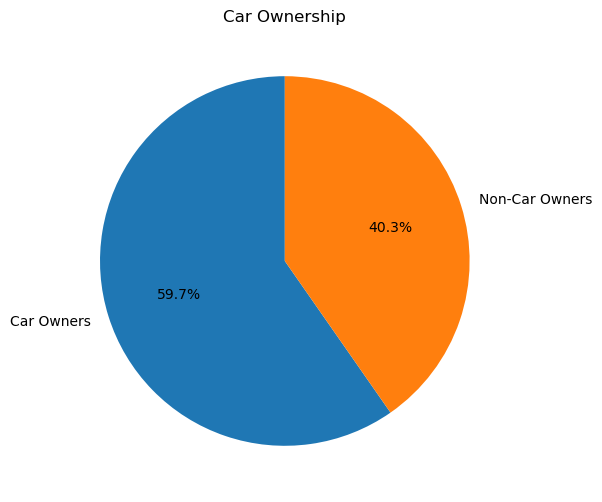

In [211]:
# Customers who owns a car and not

car_counts = creditcard_df['Car_Owner'].value_counts()
custom_labels = ['Car Owners', 'Non-Car Owners']

plt.figure(figsize=(6, 6))  # Optional: Set the figure size
plt.pie(car_counts, labels=custom_labels, autopct='%1.1f%%', startangle=90)

plt.title('Car Ownership')

plt.show()

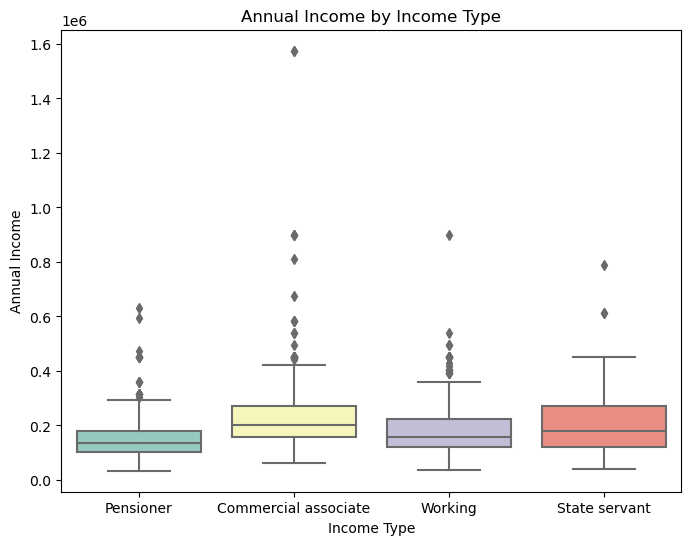

In [219]:
# Create a boxplot to visualize the relationship between Annual income and Income type

plt.figure(figsize=(8, 6))
sns.boxplot(x=creditcard_df['Income_Type'], y=creditcard_df['Annual_income'], data=df, palette='Set3')

plt.title('Annual Income by Income Type')
plt.xlabel('Income Type')
plt.ylabel('Annual Income')

plt.show()

In [222]:
# Relation between Annual incom, Income type in Gender

fig=px.bar(creditcard_df, x="Income_Type", y="Annual_income", color="Gender", barmode="group")
fig.show()

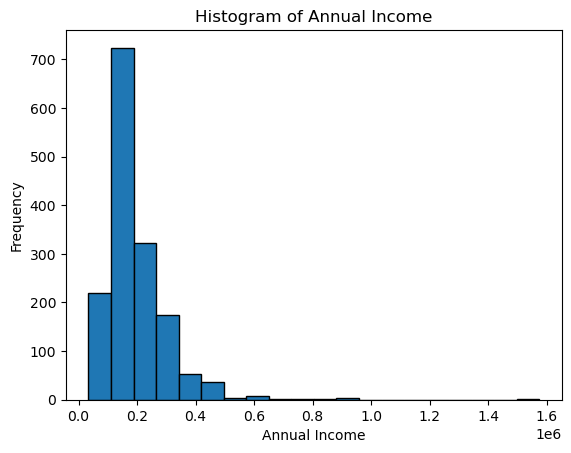

In [226]:
creditcard_df['Annual_income'].plot.hist(bins=20, edgecolor='k')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.title('Histogram of Annual Income')
plt.show()

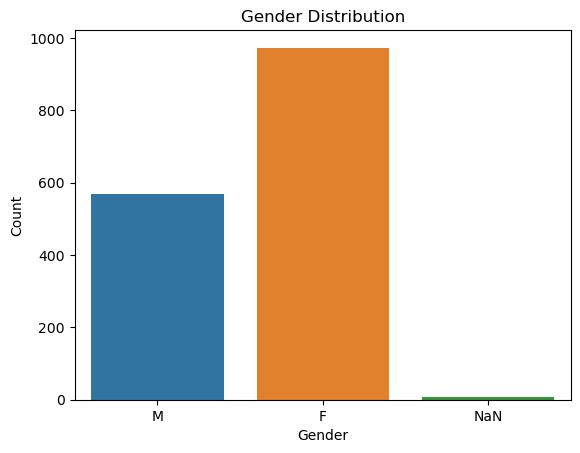

In [228]:
sns.countplot(data=creditcard_df, x='Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()

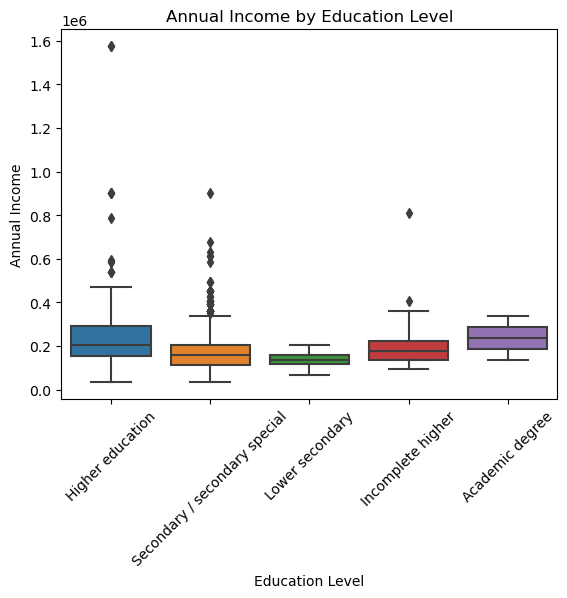

In [230]:
sns.boxplot(data=creditcard_df, x='Education', y='Annual_income')
plt.xlabel('Education Level')
plt.ylabel('Annual Income')
plt.title('Annual Income by Education Level')
plt.xticks(rotation=45)
plt.show()

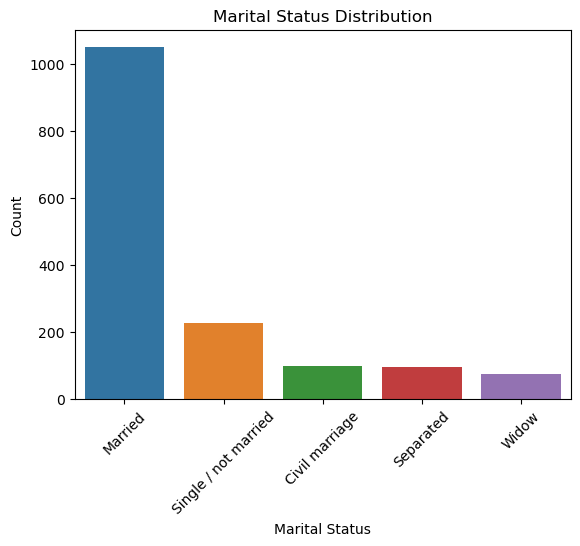

In [231]:
sns.countplot(data=creditcard_df, x='Marital_status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Marital Status Distribution')
plt.xticks(rotation=45)
plt.show()

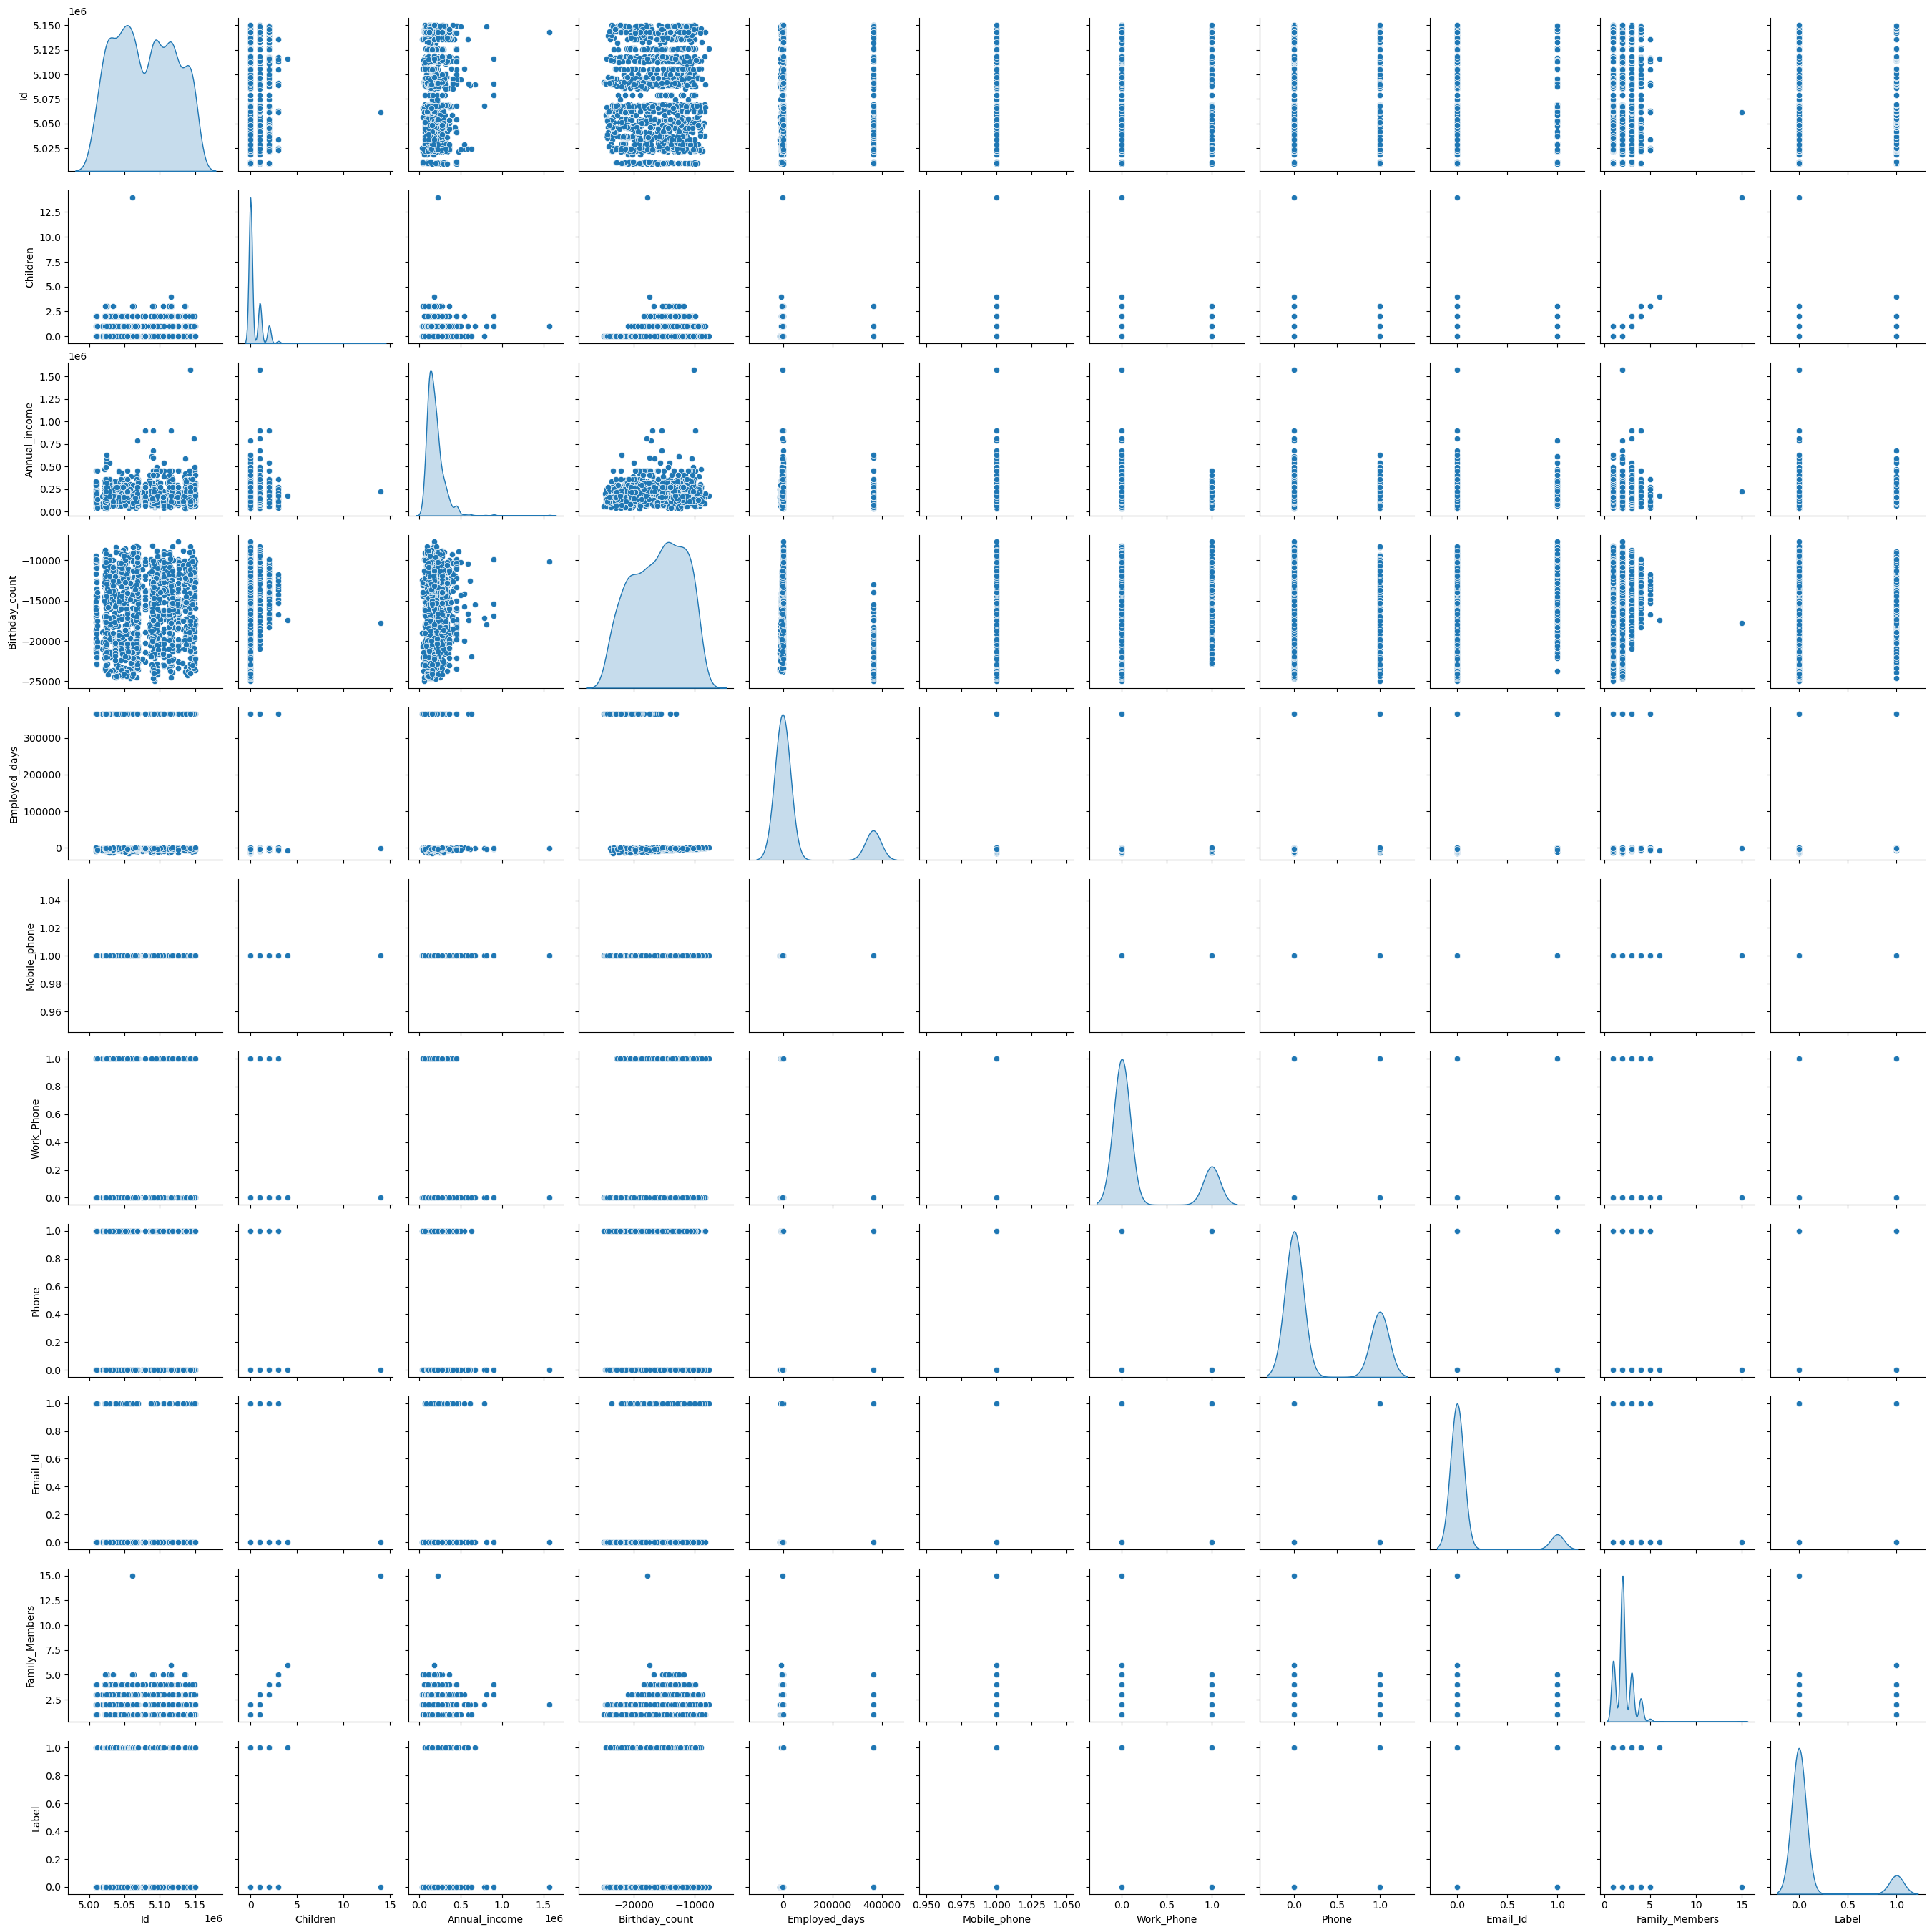

In [233]:
# Exploration using pair plot
sns.pairplot(creditcard_df, diag_kind='kde')
plt.show()

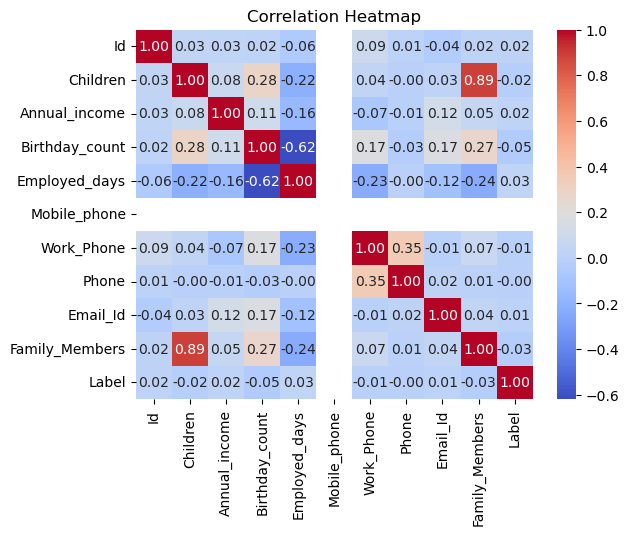

In [237]:
# Calculate the correlation matrix including all columns (both numeric and non-numeric)
correlation_matrix = creditcard_df.corr(numeric_only=True)

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [225]:
creditcard_df.head(0)

,Id,Gender,Car_Owner,Propert_Owner,Children,Annual_income,Income_Type,Education,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,Email_Id,Occupation_Type,Family_Members,Label


In [195]:
# Creating a dataframe with relevent columns:
relevent = ["Gender", "Car_Owner", "Propert_Owner", "Children", "Annual_income", "Income_Type", "Housing_type", "Employed_days","Mobile_phone", "Work_Phone", "Phone","Email_Id", "Family_Members", "Label"]
creditcard = creditcard_df[relevent]
creditcard.head()

,Gender,Car_Owner,Propert_Owner,Children,Annual_income,Income_Type,Housing_type,Employed_days,Mobile_phone,Work_Phone,Phone,Email_Id,Family_Members,Label
0,M,Y,Y,0,180000.0,Pensioner,House / apartment,365243,1,0,0,0,2,1
1,F,Y,N,0,315000.0,Commercial associate,House / apartment,-586,1,1,1,0,2,1
2,F,Y,N,0,315000.0,Commercial associate,House / apartment,-586,1,1,1,0,2,1
3,F,Y,N,0,166500.0,Commercial associate,House / apartment,-586,1,1,1,0,2,1
4,F,Y,N,0,315000.0,Commercial associate,House / apartment,-586,1,1,1,0,2,1


## Checking for outliers using boxplot

In [139]:
fig = px.box (creditcard, y="Children", width=500, height=400)
fig.show()

In [140]:
fig = px.box (creditcard, y="Family_Members", width=500, height=400,
              labels={"Family_Members"})
fig.show()

* It is showing that there are some outliers in no.of children and no.of family members.
* When we look in to the record we can see that all the points are not outliers, because there is a chance of having 4 childrens and 6 family members in a house.
* So we are only replacing the extreme values at the end.

In [187]:
# Treating outliers:
creditcard[creditcard["Family_Members"]==15]

,Gender,Car_Owner,Propert_Owner,Children,Annual_income,Income_Type,Housing_type,Employed_days,Mobile_phone,Work_Phone,Phone,Email_Id,Family_Members,Label
565,M,Y,Y,14,225000.0,Working,House / apartment,-1689,1,0,0,0,15,0


In [180]:
# The above row is having more than one outliers, so I'm droping this particular column
creditcard=[creditcard.drop([565], axis = 0)]

## 3. Data transformation or Data Wrangling

## 3.1 Encoding

In [256]:
# Dummy encoding:
credit = pd.get_dummies(creditcard, columns=['Car_Owner', 'Propert_Owner', 'Housing_type', 'Income_Type', 'Gender'], drop_first=True)
credit

,Children,Annual_income,Employed_days,Mobile_phone,Work_Phone,Phone,Email_Id,Family_Members,Label,Car_Owner_Y,...,Housing_type_House / apartment,Housing_type_Municipal apartment,Housing_type_Office apartment,Housing_type_Rented apartment,Housing_type_With parents,Income_Type_Pensioner,Income_Type_State servant,Income_Type_Working,Gender_M,Gender_NaN
0,0,180000.0,365243,1,0,0,0,2,1,1,...,1,0,0,0,0,1,0,0,1,0
1,0,315000.0,-586,1,1,1,0,2,1,1,...,1,0,0,0,0,0,0,0,0,0
2,0,315000.0,-586,1,1,1,0,2,1,1,...,1,0,0,0,0,0,0,0,0,0
3,0,166500.0,-586,1,1,1,0,2,1,1,...,1,0,0,0,0,0,0,0,0,0
4,0,315000.0,-586,1,1,1,0,2,1,1,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,0,166500.0,-2182,1,0,0,0,2,0,0,...,1,0,0,0,0,0,0,0,0,0
1544,0,225000.0,-1209,1,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
1545,2,180000.0,-2477,1,0,0,0,4,0,1,...,1,0,0,0,0,0,0,1,1,0
1546,0,270000.0,-645,1,1,1,0,2,0,1,...,1,0,0,0,0,0,0,1,1,0


## 3.2 Seperating the dependent and independent variables

In [296]:
columns = ["Children", "Annual_income", "Employed_days", "Family_Members","Car_Owner_Y", "Propert_Owner_Y", "Housing_type_House / apartment", "Housing_type_Municipal apartment", "Housing_type_Office apartment", "Housing_type_Rented apartment", "Housing_type_With parents", "Income_Type_Pensioner", "Income_Type_State servant", "Income_Type_Working", "Gender_M", "Gender_NaN"]
x = credit[columns]
y = credit["Label"]
x.head()

,Children,Annual_income,Employed_days,Family_Members,Car_Owner_Y,Propert_Owner_Y,Housing_type_House / apartment,Housing_type_Municipal apartment,Housing_type_Office apartment,Housing_type_Rented apartment,Housing_type_With parents,Income_Type_Pensioner,Income_Type_State servant,Income_Type_Working,Gender_M,Gender_NaN
0,0,180000.0,365243,2,1,1,1,0,0,0,0,1,0,0,1,0
1,0,315000.0,-586,2,1,0,1,0,0,0,0,0,0,0,0,0
2,0,315000.0,-586,2,1,0,1,0,0,0,0,0,0,0,0,0
3,0,166500.0,-586,2,1,0,1,0,0,0,0,0,0,0,0,0
4,0,315000.0,-586,2,1,0,1,0,0,0,0,0,0,0,0,0


In [297]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Label, dtype: int64

## 3.4 Train Test Split

In [298]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15, random_state = 16)

In [299]:
x_train.head()

,Children,Annual_income,Employed_days,Family_Members,Car_Owner_Y,Propert_Owner_Y,Housing_type_House / apartment,Housing_type_Municipal apartment,Housing_type_Office apartment,Housing_type_Rented apartment,Housing_type_With parents,Income_Type_Pensioner,Income_Type_State servant,Income_Type_Working,Gender_M,Gender_NaN
132,0,112500.0,365243,2,0,0,0,1,0,0,0,1,0,0,0,0
919,0,135000.0,365243,2,0,0,1,0,0,0,0,1,0,0,1,0
1388,0,247500.0,-1871,2,1,1,1,0,0,0,0,0,0,0,0,0
508,0,90000.0,-793,2,0,1,1,0,0,0,0,0,0,0,0,0
1420,0,247500.0,-2980,2,0,1,1,0,0,0,0,0,0,0,0,0


In [300]:
x_test.head()

,Children,Annual_income,Employed_days,Family_Members,Car_Owner_Y,Propert_Owner_Y,Housing_type_House / apartment,Housing_type_Municipal apartment,Housing_type_Office apartment,Housing_type_Rented apartment,Housing_type_With parents,Income_Type_Pensioner,Income_Type_State servant,Income_Type_Working,Gender_M,Gender_NaN
89,0,202500.0,-1394,2,1,0,0,0,0,0,1,0,0,1,1,0
920,1,360000.0,-2908,3,0,0,1,0,0,0,0,0,0,1,1,0
1439,0,135000.0,-10762,2,0,0,1,0,0,0,0,0,0,1,0,0
1464,0,180000.0,365243,2,0,1,1,0,0,0,0,1,0,0,0,0
1103,1,180000.0,-5981,2,1,1,1,0,0,0,0,0,0,1,0,0


In [301]:
y_train.head()

132     1
919     0
1388    0
508     0
1420    0
Name: Label, dtype: int64

In [302]:
y_test.head()

89      1
920     0
1439    0
1464    0
1103    0
Name: Label, dtype: int64

## 3.5 Standardization / Feature scaling

In [303]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## 4. Machine learning approach

## 4.1 LogisticRegression

In [304]:
# Modeling
from sklearn.linear_model import LogisticRegression
logistic_reg = LogisticRegression(random_state = 0, max_iter=1000)
logistic_reg.fit(x_train, y_train)

# Predictions
ypred_train = logistic_reg.predict(x_train)
ypred_test  = logistic_reg.predict(x_test)


# Evaluation
from sklearn.metrics import accuracy_score
print("Train Accuracy: ", accuracy_score(y_train, ypred_train))
print("Test Accuracy: ", accuracy_score(y_test, ypred_test))

# Calculation of cross validation score:
from sklearn.model_selection import cross_val_score
print("Cross validation score: ", cross_val_score(logistic_reg, x,y, cv=5, scoring="accuracy").mean())

Train Accuracy:  0.8935361216730038
Test Accuracy:  0.8798283261802575
Cross validation score:  0.8869506211504332


## 4.2 KNN

In [305]:
# K-Nearest Neighbors with default parameters

# Modeling
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(x_train, y_train)

# Prediction
ypred_train = model.predict(x_train)
ypred_test  = model.predict(x_test)

# Evaluation
from sklearn.metrics import accuracy_score
print("Train Accuracy: ", accuracy_score(y_train, ypred_train))
print("Test Accuracy: ", accuracy_score(y_test, ypred_test))

from sklearn.model_selection import cross_val_score
print("Cross validation score: ", cross_val_score(model,x,y, cv=5, scoring="accuracy").mean())

Train Accuracy:  0.9064638783269962
Test Accuracy:  0.8454935622317596
Cross validation score:  0.8514082889654452


In [306]:
# Hyper Parameter Tuning to improve the model's performance with best combination of hyperparameters

from sklearn.model_selection import GridSearchCV

estimator = KNeighborsClassifier()

param_grid = {'n_neighbors': list(range(1,11))}

cv_classifier = GridSearchCV(estimator, param_grid, cv=5, scoring='accuracy')

cv_classifier.fit(x_train, y_train)

cv_classifier.best_params_

{'n_neighbors': 4}

In [307]:
# KNN with the best combinations
# Applying the k value obtained from Hyper parameter tuning to the KNN to get the best accuracy & CVS

# Modeling
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 4)     # Changed the default K value to the value obtained from HPT
model.fit(x_train, y_train)

# Prediction
ypred = model.predict(x_test)
ypred_train = model.predict(x_train)
ypred_test  = model.predict(x_test)

# Evaluation
from sklearn.metrics import accuracy_score
print("Train Accuracy: ", accuracy_score(y_train, ypred_train))
print("Test Accuracy: ", accuracy_score(y_test, ypred_test))

from sklearn.model_selection import cross_val_score
print("Cross validation score: ", cross_val_score(model,x,y, cv=5, scoring="accuracy").mean())

Train Accuracy:  0.9064638783269962
Test Accuracy:  0.8669527896995708
Cross validation score:  0.8630399832967951


## 4.3 SVM

In [308]:
# Support vector machine with default parameters

# Modeling
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(x_train, y_train)

# Prediction
ypred_train = svm_model.predict(x_train)
ypred_test  = svm_model.predict(x_test)

# Evaluation
from sklearn.metrics import accuracy_score
print("Train Accuracy: ", accuracy_score(y_train, ypred_train))
print("Test Accuracy: ", accuracy_score(y_test, ypred_test))

from sklearn.model_selection import cross_val_score
print("cross validation score: ", cross_val_score(model, x, y, cv=5, scoring="accuracy").mean())

Train Accuracy:  0.8973384030418251
Test Accuracy:  0.8798283261802575
cross validation score:  0.8630399832967951


In [309]:
# Hyper Parameter Tuning to improve the model's performance with best combination of hyperparameters

from sklearn.model_selection import GridSearchCV

estimator = SVC()

param_grid = {'kernel':['linear', 'rbf', 'sigmoid', 'poly']}

grid = GridSearchCV(estimator, param_grid, cv=5)

grid.fit(x,y)

grid.best_params_

KeyboardInterrupt: 

In [275]:
## The svm algorithm is showing a good value without the help of GridSearchCV
## So no need for more combinations and also the HPT is taking too much time

## 4.4 Decision tree

In [276]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()

dt_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [316]:
# Decision tree with default parameters

# Modeling
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=16)
dt_model.fit(x_train, y_train)

# Prediction
ypred_train = dt_model.predict(x_train)
ypred_test  = dt_model.predict(x_test)

# Evaluation
from sklearn.metrics import accuracy_score
print("Train Accuracy: ", accuracy_score(y_train, ypred_train))
print("Test Accuracy: ", accuracy_score(y_test, ypred_test))

from sklearn.model_selection import cross_val_score
print("cross validation score: ", cross_val_score(model, x, y, cv=5, scoring="accuracy").mean())

Train Accuracy:  0.9870722433460076
Test Accuracy:  0.8412017167381974
cross validation score:  0.8630399832967951


In [317]:
# Hyper Parameter Tuning to improve the model's performance with best combination of hyperparameters

from sklearn.model_selection import GridSearchCV

estimator = DecisionTreeClassifier(random_state=16)

param_grid = {"criterion":["gini","entropy"], "max_depth":list(range(1,11))}

grid = GridSearchCV(estimator, param_grid, cv=5)

grid.fit(x,y)

grid.best_params_

{'criterion': 'gini', 'max_depth': 2}

In [318]:
# Decision tree with the best combinations

# Modeling
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=16, criterion='gini', max_depth=2)
dt_model.fit(x_train, y_train)

# Prediction
ypred_train = dt_model.predict(x_train)
ypred_test  = dt_model.predict(x_test)

# Evaluation
from sklearn.metrics import accuracy_score
print("Train Accuracy: ", accuracy_score(y_train, ypred_train))
print("Test Accuracy: ", accuracy_score(y_test, ypred_test))

from sklearn.model_selection import cross_val_score
print("cross validation score: ", cross_val_score(model, x, y, cv=5, scoring="accuracy").mean())

Train Accuracy:  0.8912547528517111
Test Accuracy:  0.8798283261802575
cross validation score:  0.8630399832967951


## 4.5 Random forest

In [319]:
# Random forest with default parameters

# Modeling
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=16)
model.fit(x_train, y_train)

# Prediction
ypred_train = model.predict(x_train)
ypred_test  = model.predict(x_test)

# Evaluation
from sklearn.metrics import accuracy_score
print("Train Accuracy: ", accuracy_score(y_train, ypred_train))
print("Test Accuracy: ", accuracy_score(y_test, ypred_test))

from sklearn.model_selection import cross_val_score
print("cross validation score: ", cross_val_score(model, x, y, cv=5, scoring="accuracy").mean())

Train Accuracy:  0.9870722433460076
Test Accuracy:  0.8969957081545065
cross validation score:  0.8727361937571771


In [321]:
# Hyper Parameter Tuning to improve the model's performance with best combination of hyperparameters

from sklearn.model_selection import GridSearchCV

estimator = RandomForestClassifier (random_state=0)

param_grid = {'n_estimators' :list(range(1,101)), "max_depth" :list(range(1,11))}

grid = GridSearchCV(estimator, param_grid, scoring="accuracy",cv=5)

grid.fit(x_train,y_train)

grid.best_params_

{'max_depth': 10, 'n_estimators': 20}

In [324]:
# Random forest with the best combinations

# Modeling
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=16, max_depth=10, n_estimators=20)
model.fit(x_train, y_train)

# Prediction
ypred_train = model.predict(x_train)
ypred_test  = model.predict(x_test)

# Evaluation
from sklearn.metrics import accuracy_score
print("Train Accuracy: ", accuracy_score(y_train, ypred_train))
print("Test Accuracy: ", accuracy_score(y_test, ypred_test))

from sklearn.model_selection import cross_val_score
print("cross validation score: ", cross_val_score(model, x, y, cv=5, scoring="accuracy").mean())

Train Accuracy:  0.9269961977186312
Test Accuracy:  0.8798283261802575
cross validation score:  0.8882409437310784


In [325]:
# Measuring the importance of each feature in this model
model.feature_importances_

array([0.05152183, 0.22645392, 0.32439426, 0.0682556 , 0.04543015,
       0.03437463, 0.02511313, 0.03311013, 0.00625759, 0.00761502,
       0.01481169, 0.02631719, 0.02346176, 0.02809524, 0.03423136,
       0.0505565 ])

## 4.6 XG Boost

In [326]:
# Modeling
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(x_train, y_train)

# Prediction
ypred_train = xgb_model.predict(x_train)
ypred_test  = xgb_model.predict(x_test)

# Evaluation
from sklearn.metrics import accuracy_score
print("Train Accuracy: ", accuracy_score(y_train, ypred_train))
print("Test Accuracy: ", accuracy_score(y_test, ypred_test))

from sklearn.model_selection import cross_val_score
print("cross validation score: ", cross_val_score(model, x, y, cv=5, scoring="accuracy").mean())

Train Accuracy:  0.9771863117870723
Test Accuracy:  0.8841201716738197
cross validation score:  0.8882409437310784


## Model Selection

Selecting the best model on the basic of:
    
(a) Condition1: Test accuracy = Train accuracy = Cross validation score (+/- 5 is accaptable)
    
(b) Condition2: If the more than one model is satisfing the 1st condition go for the model having the highest CV

In [328]:
accuracy = pd.DataFrame({
    "Model":["Logistic regression", "KNN", "SVM", "Decission tree", "Random forest", "XG Boost"],
    "Train Accuracy":[0.89,0.90,0.89,0.89,0.92,0.97],
    "Test Accuracy":[0.87,0.86,0.87,0.87,0.87,0.88],
    "Cross Validation Score":[0.88,0.86,0.86,0.86,0.88,0.88]
})
accuracy

,Model,Train Accuracy,Test Accuracy,Cross Validation Score
0,Logistic regression,0.89,0.87,0.88
1,KNN,0.90,0.86,0.86
2,SVM,0.89,0.87,0.86
3,Decission tree,0.89,0.87,0.86
4,Random forest,0.92,0.87,0.88
5,XG Boost,0.97,0.88,0.88


* Among all the models XGBoost is appears to be a good one wiht highest train accuracy, decent test accuracy and decent cross validation score.
* So XGBoost is the best model here

In [329]:
# XG Boost (Selected Model)

# Modeling
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(x_train, y_train)

# Prediction
ypred_train = xgb_model.predict(x_train)
ypred_test  = xgb_model.predict(x_test)

# Evaluation
from sklearn.metrics import accuracy_score
print("Train Accuracy: ", accuracy_score(y_train, ypred_train))
print("Test Accuracy: ", accuracy_score(y_test, ypred_test))

from sklearn.model_selection import cross_val_score
print("cross validation score: ", cross_val_score(model, x, y, cv=5, scoring="accuracy").mean())

Train Accuracy:  0.9771863117870723
Test Accuracy:  0.8841201716738197
cross validation score:  0.8882409437310784


## Checking for confusion metrix and Classification report for the final model

In [330]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, ypred_test))

[[197   8]
 [ 19   9]]


In [331]:
from sklearn.metrics import classification_report
print(classification_report(y_test, ypred_test))

              precision    recall  f1-score   support

           0       0.91      0.96      0.94       205
           1       0.53      0.32      0.40        28

    accuracy                           0.88       233
   macro avg       0.72      0.64      0.67       233
weighted avg       0.87      0.88      0.87       233

